In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [9]:
df=pd.read_csv(r'D:\PROJECTS\air-passenger-prediction-using-fb-prophet\dataset\data.txt')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [10]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [11]:

df.drop(144,inplace=True)


In [12]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [13]:
df.rename(columns={"Month":"ds","Thousands of Passengers":"y"},inplace=True)
          

In [14]:
#converting date from string to datetime
df['ds']=pd.to_datetime(df['ds'])

In [15]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


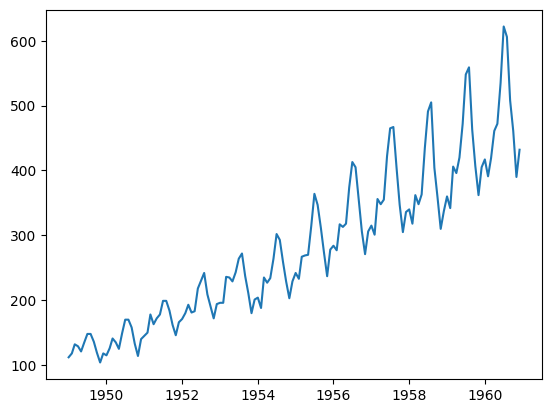

In [25]:
plt.plot(df['ds'],df['y'])

In [16]:
from prophet import Prophet

In [17]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [18]:
model =Prophet()


In [19]:
model.fit(df)

09:36:15 - cmdstanpy - INFO - Chain [1] start processing
09:36:16 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [27]:
# create  future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [34]:
prediction =model.predict(future_dates)

In [35]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,53.033177,112.808792,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,50.377696,107.109825,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,82.082360,138.839620,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,77.831118,136.181026,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,83.063429,137.007062,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255


In [42]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


d:\PROJECTS\air-passenger-prediction-using-fb-prophet\prof\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\PROJECTS\air-passenger-prediction-using-fb-prophet\prof\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


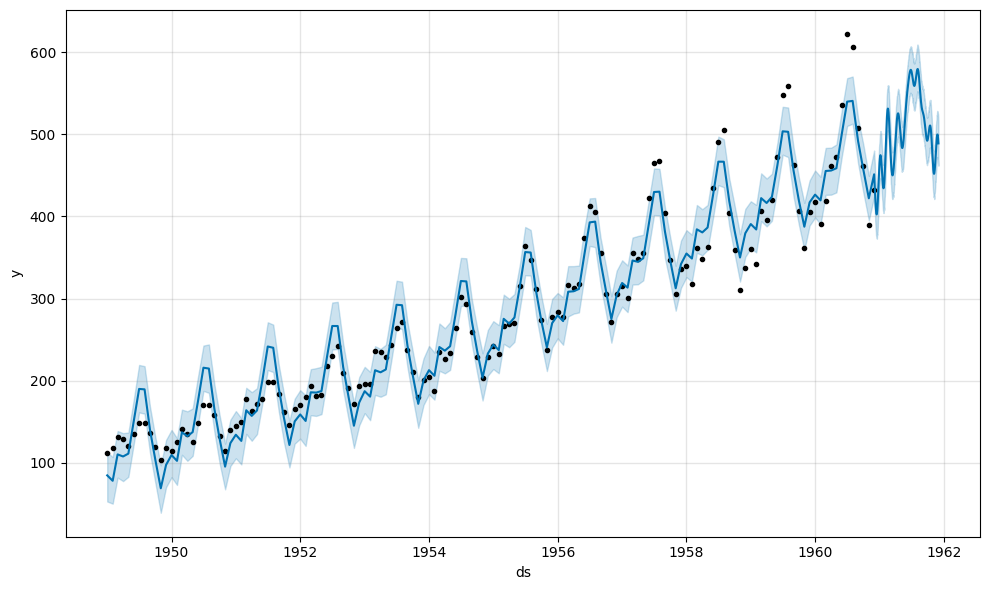

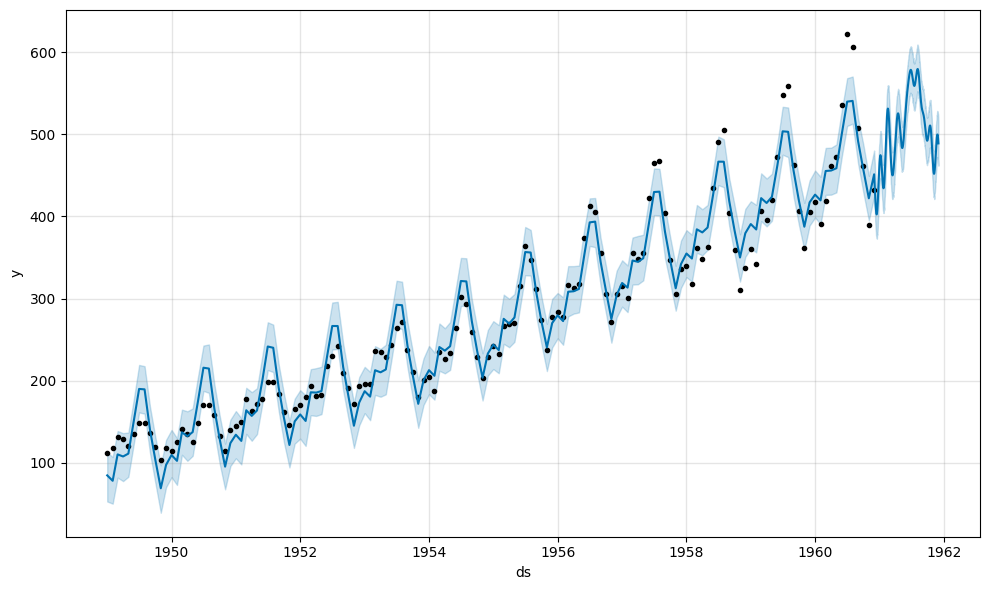

In [36]:
model.plot(prediction)

d:\PROJECTS\air-passenger-prediction-using-fb-prophet\prof\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\PROJECTS\air-passenger-prediction-using-fb-prophet\prof\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
d:\PROJECTS\air-passenger-prediction-using-fb-prophet\prof\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a

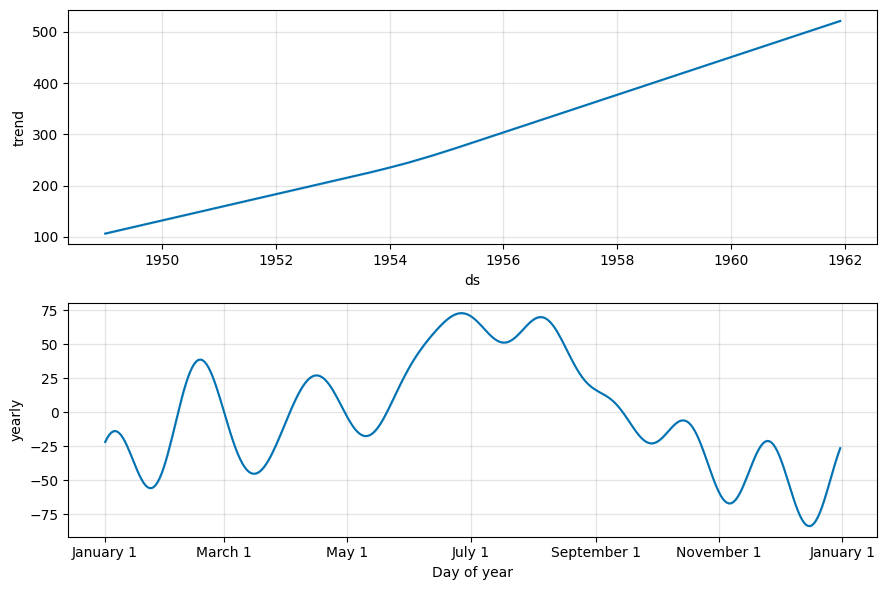

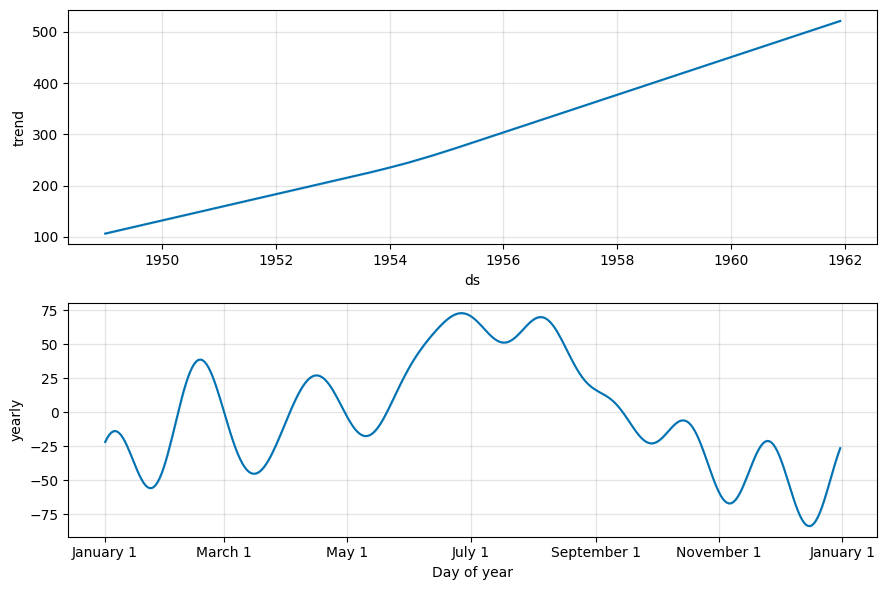

In [37]:
#visualise each component [ Trends,Yearly]
model.plot_components(prediction)

#Time series Test Analysis

1960 to 1962
cross validation
1960 -61 train dataset
1961 to 62  test dataset
1963 to 63   validation 

In [39]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model,initial='730 days',period='180 days',horizon='365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]11:06:53 - cmdstanpy - INFO - Chain [1] start processing
11:07:21 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 1/19 [00:28<08:28, 28.27s/it]11:07:21 - cmdstanpy - INFO - Chain [1] start processing
11:07:21 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 2/19 [00:28<03:24, 12.02s/it]11:07:21 - cmdstanpy - INFO - Chain [1] start processing
11:07:22 - cmdstanpy - INFO - Chain [1] done processing
 16%|█▌        | 3/19 [00:29<01:49,  6.82s/it]11:07:22 - cmdstanpy - INFO - Chain [1] start processing
11:07:23 - cmdstanpy - INFO - Chain [1] done processing
 21%|██        | 4/19 [00:30<01:06,  4.40s/it]11:07:23 - cmdstanpy - INFO - Chain [1] start processing
11:07:23 - cmdstanpy - INFO - Chain [1] done processing
 26%|██▋       | 5/19 [00:30<00:42,  3.01s/it]11:07:23 - cmdstanpy - INFO - Chain [1] start processing
11:07:24 - cmdstanpy - INFO - Chain [1] done processing
 32%|███▏      | 6/19 [00:31<00:28,  2.19s/it]11:07:24

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.205061,156.976792,157.435880,150.0,1951-01-18
1,1951-03-01,169.726695,168.997145,170.499909,178.0,1951-01-18
2,1951-04-01,157.272915,155.837276,158.773148,163.0,1951-01-18
3,1951-05-01,143.304512,140.964330,145.720499,172.0,1951-01-18
4,1951-06-01,178.017955,174.629899,181.468661,178.0,1951-01-18


In [40]:
from prophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1087.585276,32.978558,25.828241,0.078205,0.073741,0.079259,0.227273
1,42 days,1014.336159,31.848645,25.247395,0.076910,0.073741,0.077630,0.181818
2,46 days,909.313866,30.154832,24.670936,0.078810,0.079315,0.078584,0.136364
3,47 days,1044.683167,32.321559,26.845514,0.081984,0.085520,0.082145,0.136364
4,48 days,1034.252775,32.159801,26.300152,0.080102,0.085520,0.080328,0.181818


d:\PROJECTS\air-passenger-prediction-using-fb-prophet\prof\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
d:\PROJECTS\air-passenger-prediction-using-fb-prophet\prof\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


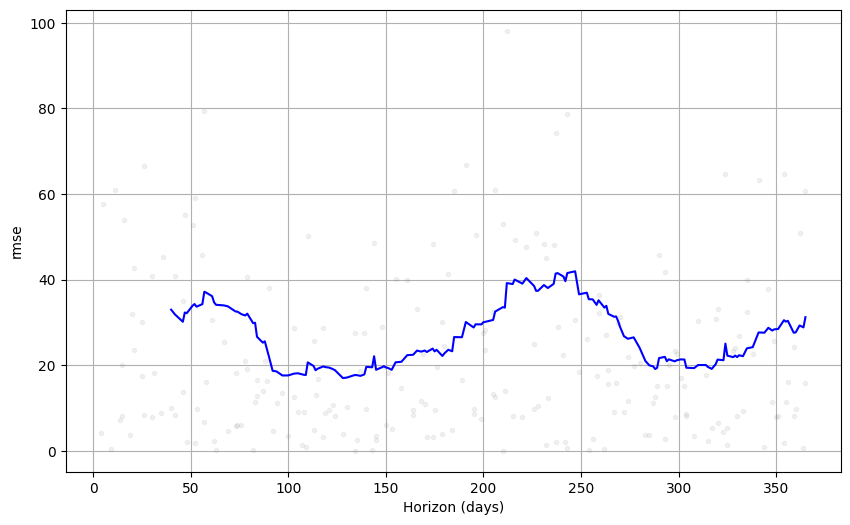

In [41]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')